## Name - Kratika soni
## Batch - DST 20823
## Batch starting date - 01/09/2023
# credit card fraud detection in financial transaction

In [1]:
# Importing Libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from matplotlib import gridspec

# Using Scikit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier , plot_tree

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, StratifiedKFold

from scipy.spatial.distance import mahalanobis

import warnings
warnings.filterwarnings('ignore')

### Dataset

In [2]:
# Loading data-set
df = pd.read_csv('creditcard.csv')
df.head().append(df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [3]:
#dataset row-column size
df.shape

(284807, 31)

In [4]:
# Information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Code : Imbalance the data

In [5]:
# Determine number of fraud cases in dataset 
fraud_data = df[df['Class'] == 1] 
not_fraud_data = df[df['Class'] == 0] 
outlierFraction = len(fraud_data)/float(len(not_fraud_data)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0]))) 

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


#### Analysis: 0.17% fraudulent transaction out all the transactions. 
#### The data is unbalanced

In [7]:
print('Amount details of the fraudulent transaction') 
fraud_data.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
print('details of valid transaction') 
not_fraud_data.Amount.describe() 

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

### Note: The average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

## Selecting the sample data

In [9]:
fraud_size = 469

# Randomly sample a subset of fraud data
fraud_data_sampled = fraud_data.sample(n=fraud_size, random_state=42)

nonfraud_size = 10000
# Randomly sample a subset of not fraud data
not_fraud_data_sampled = not_fraud_data.sample(n=nonfraud_size, random_state=42)

# Concatenate fraud and sampled not fraud data to create a partially balanced dataset
sample_df = pd.concat([fraud_data_sampled, not_fraud_data_sampled])

# Shuffle the dataset
sample_df = sample_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(sample_df)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10464   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10465  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10466   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10467   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10468   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V21 

### Note: The sample data is more balanced as compare to original data.

## Determine the count of null values

In [10]:
total_null_values = sample_df.isna().sum()
print("Total Null Values:", total_null_values)

Total Null Values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


#### No null values are available in the dataset

## Determine the count of duplicate records

In [11]:
total_duplicates = sample_df.duplicated().sum()
print("Total Duplicates:", total_duplicates)

Total Duplicates: 19


## Drop duplicate records

In [12]:
df.drop_duplicates(inplace=True)

#### Deleting the rows that contain duplicate records

## Descriptive Statistics

In [14]:
sample_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,...,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000,10469.000000
mean,94619.050912,-0.210827,0.162484,-0.324104,0.196367,-0.113704,-0.063677,-0.242445,0.031089,-0.101068,...,0.028459,0.002028,0.003054,-0.007441,-0.005638,0.003127,0.010601,0.004367,87.960394,0.044799
std,47478.779347,2.552499,1.962975,2.516929,1.771557,1.843191,1.394620,2.204739,1.807143,1.315768,...,1.093648,0.767719,0.649903,0.610797,0.539414,0.483206,0.485823,0.335958,223.139608,0.206872
min,0.000000,-30.552380,-32.494845,-31.103685,-4.790224,-22.105532,-17.282140,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.836627,-4.781606,-1.535092,-7.263482,-8.307955,0.000000,0.000000
25%,54235.000000,-1.000611,-0.574866,-1.068442,-0.808105,-0.719747,-0.816297,-0.620680,-0.208818,-0.703000,...,-0.222532,-0.540192,-0.168297,-0.359331,-0.328473,-0.329211,-0.069586,-0.052366,4.990000,0.000000
50%,85048.000000,-0.050579,0.106427,0.092281,0.047778,-0.061170,-0.298618,0.020887,0.030757,-0.071640,...,-0.019763,0.006034,-0.011850,0.035341,0.014511,-0.046772,0.004100,0.012597,21.130000,0.000000
75%,139115.000000,1.288200,0.890081,0.976668,0.890598,0.635919,0.378412,0.574940,0.358279,0.580333,...,0.201241,0.524395,0.155159,0.429601,0.352187,0.256109,0.104411,0.086041,78.000000,0.000000
max,172768.000000,2.398119,22.057729,3.770236,11.927512,28.516513,15.323769,15.915767,20.007208,7.929051,...,27.202839,8.361985,15.626067,4.016342,5.541598,2.859167,9.879903,15.373170,5627.060000,1.000000


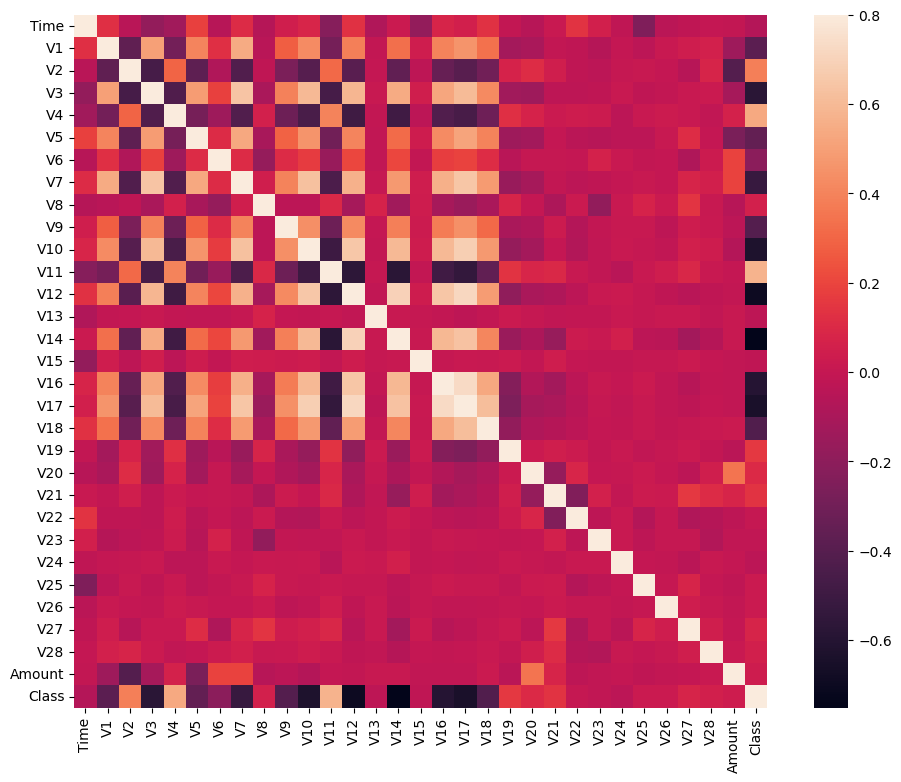

In [15]:
# Correlation matrix 
corrmat = sample_df.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 

### Conclusion: In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.
#### V2 and V5 are highly negatively correlated with the feature called amount. 
#### There is some correlation with the V20 and amount.

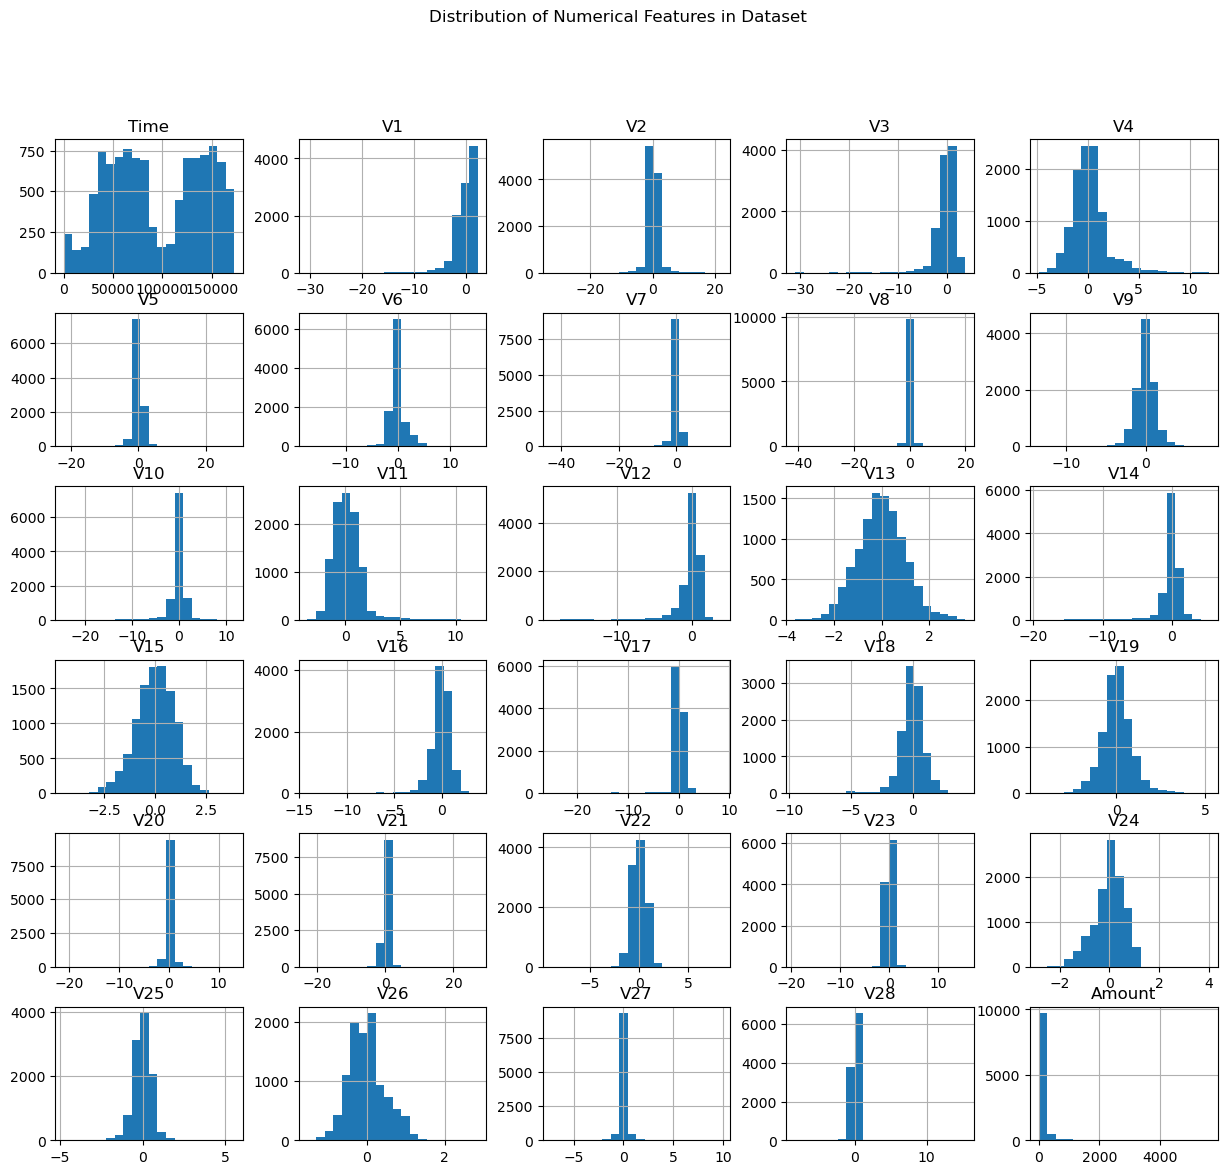

In [16]:
sample_df.drop('Class', axis=1).hist(figsize=(15, 13), bins=20)
plt.suptitle('Distribution of Numerical Features in Dataset')
plt.show()

## Count of Fraud/Non-Fraud Records

In [17]:
class_counts = sample_df['Class'].value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
0    10000
1      469
Name: Class, dtype: int64


## Split features and label

In [18]:
X = sample_df.drop(["Class"], axis=1)
Y = sample_df["Class"]

## Outliers identification and removal

In [19]:
# Resetting index for X and Y
X = X.reset_index(drop=True)
Y = Y.reset_index(drop=True)

# Calculate Mahalanobis distance
covariance = np.cov(X.T)
mean = np.mean(X, axis=0)
distances = [mahalanobis(x, mean, np.linalg.inv(covariance)) for x in X.values]

# Define the threshold for outliers
threshold = np.mean(distances) + 2 * np.std(distances)

# Identify and handle outliers
outlier_mask = np.array(distances) > threshold
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Identify and handle outliers by removing them
X_no_outliers = X.loc[~outlier_mask].reset_index(drop=True)
Y_no_outliers = Y.loc[~outlier_mask].reset_index(drop=True)

# Display the modified feature set and labels without outliers
print(X_no_outliers)
print(Y_no_outliers)

           Time        V1        V2        V3        V4        V5        V6  \
0       62538.0  1.093688 -0.123989  1.380520  1.283623 -1.085386 -0.014911   
1       22566.0 -1.772826 -0.540115  2.172017 -2.109174  0.462264 -0.141527   
2      153948.0  2.156591 -0.760941 -1.275143 -0.890670 -0.574581 -1.057300   
3      136261.0  0.878862 -2.769036 -1.329463  1.004904 -1.463248  0.156821   
4      105369.0 -1.127617  0.743345  0.411072 -1.096808  1.958827  0.006477   
...         ...       ...       ...       ...       ...       ...       ...   
10117   43537.0  1.206519 -0.721788 -0.489190 -0.902929  1.295684  3.883517   
10118  128493.0  2.034027 -0.208329 -0.879314  0.029074 -0.236303 -0.731470   
10119   61446.0 -0.891747  1.137517  1.267979 -0.092807 -0.235736 -0.290039   
10120   88396.0  1.749326 -0.392480 -1.968671  0.645189 -0.032361 -1.408573   
10121   28022.0 -0.958739  0.425510  1.989221 -2.061040 -0.628631 -0.290177   

             V7        V8        V9  ...       V20 

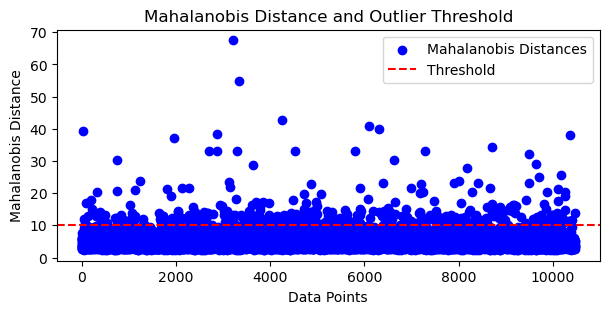

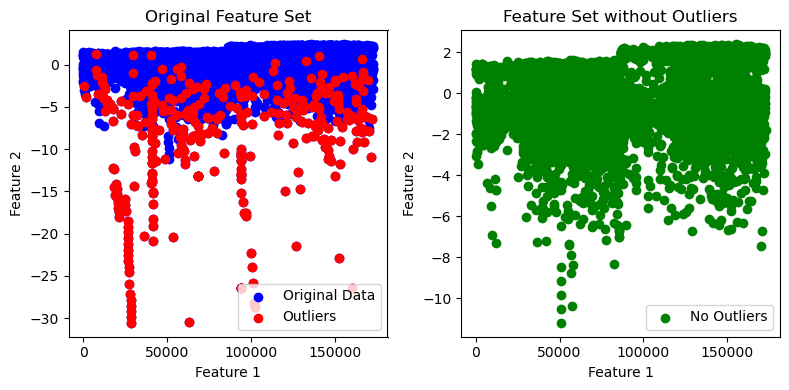

In [20]:
# mhalanobis distances
plt.figure(figsize=(7, 3))
plt.scatter(range(len(distances)), distances, c='blue', label='Mahalanobis Distances')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Data Points')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance and Outlier Threshold')
plt.legend()
plt.show()

# before and after outliers removal
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='blue', label='Original Data')
plt.scatter(X[outlier_mask].iloc[:, 0], X[outlier_mask].iloc[:, 1], c='red', label='Outliers')
plt.title('Original Feature Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_no_outliers.iloc[:, 0], X_no_outliers.iloc[:, 1], c='green', label='No Outliers')
plt.title('Feature Set without Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()

## Splitting Training and Testing Data 

In [21]:
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(X_no_outliers, Y_no_outliers, test_size = 0.3, random_state = 42) 

## Selecting Top Effective Features

In [22]:
# Train the decision tree model
model = DecisionTreeClassifier(random_state=42, min_samples_leaf=10, max_depth=4, criterion="entropy")
model.fit(xTrain, yTrain)

# Get feature importances
feature_importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(feature_importances)[::-1]

# Select the top N features (e.g., top 10)
top_n = 10
top_n_features = xTrain.columns[indices[:top_n]]

# Subset the training and test sets with the top N features
X_train_selected = xTrain[top_n_features]
X_test_selected = xTest[top_n_features]

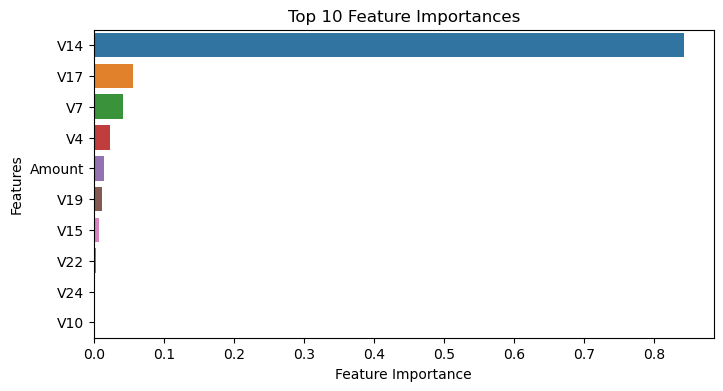

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x=feature_importances[indices[:top_n]], y=top_n_features)
plt.title('Top {} Feature Importances'.format(top_n))
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [24]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

## Decision Tree Model Training

In [25]:
dt_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=10, max_depth=4,criterion="entropy")

# Train the model on the training data
dt_model.fit(X_train_selected, yTrain)

# Make predictions on the test set
Y_pred = dt_model.predict(X_test_selected)

## Decision Tree Model Plotting

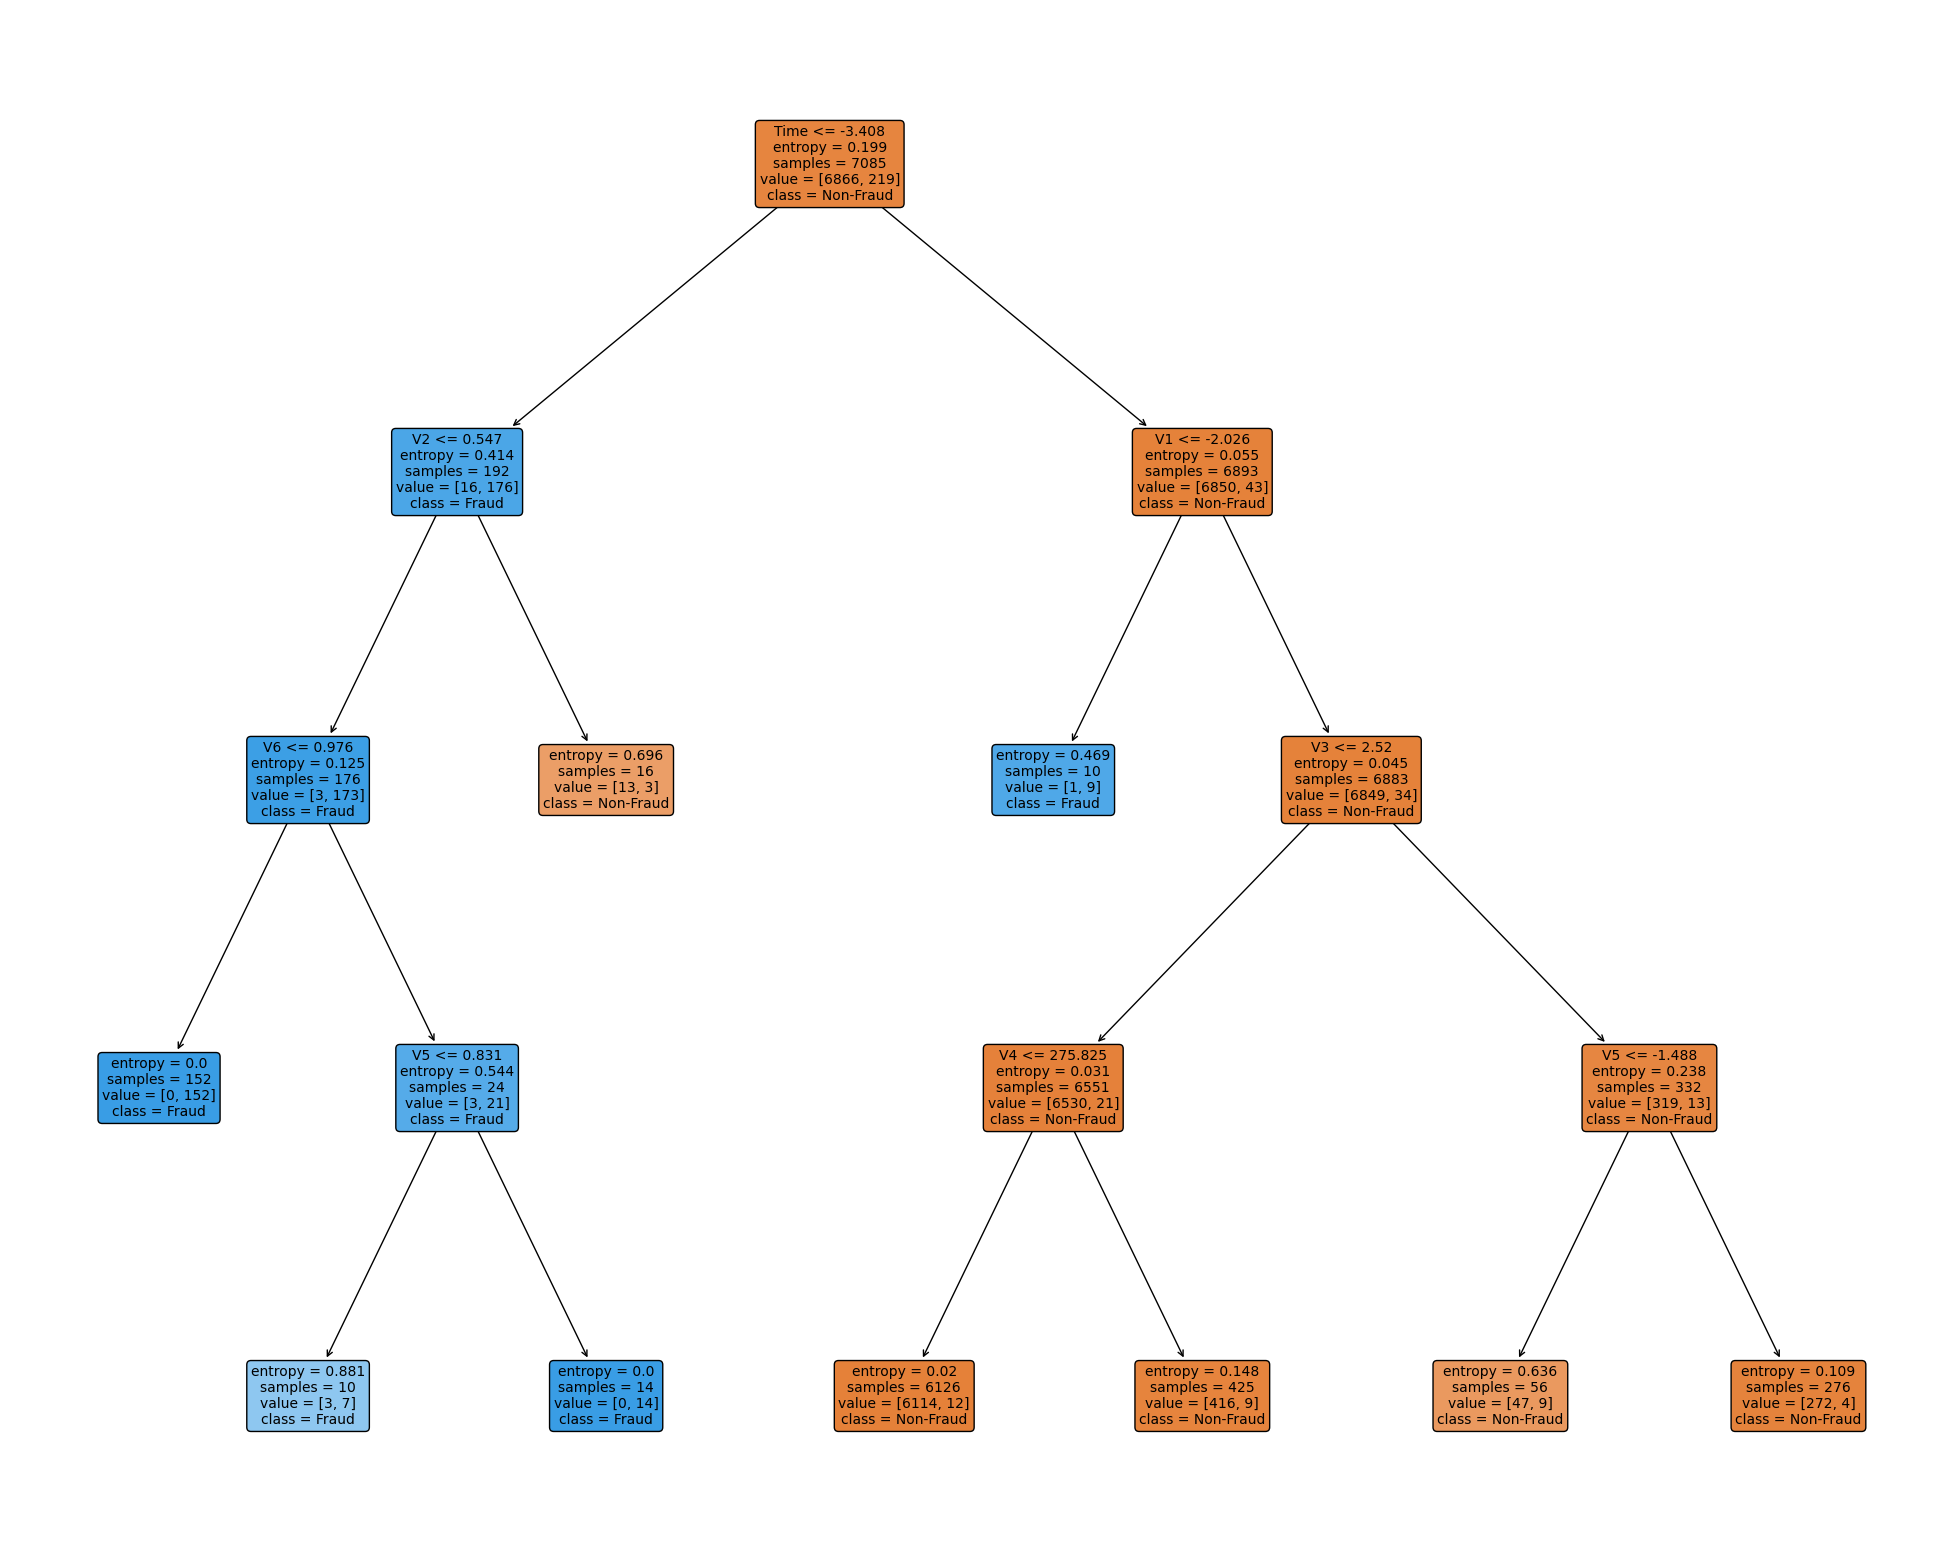

In [26]:
# Visualize the decision tree
plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=X_no_outliers.columns, class_names=['Non-Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.show()

## Decision Tree Model Evaluation

In [27]:
# Assuming you have Y_test and Y_pred defined
# ...

# Evaluate the model
accuracy = accuracy_score(yTest, Y_pred)
classification_report_result = classification_report(yTest, Y_pred)
confusion_matrix_result = confusion_matrix(yTest, Y_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(yTest, Y_pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2932
           1       0.99      0.71      0.83       105

    accuracy                           0.99      3037
   macro avg       0.99      0.86      0.91      3037
weighted avg       0.99      0.99      0.99      3037


Confusion Matrix:
[[2931    1]
 [  30   75]]

Accuracy: 0.9897925584458347
Precision: 0.9897636617412425
Recall: 0.9897925584458347
F1 Score: 0.9889999511110887


## Decision Tree Model Confusion Matrix Plotting

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

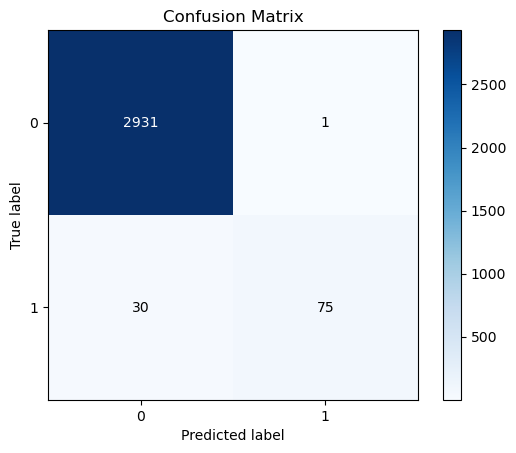

In [28]:
skplt.metrics.plot_confusion_matrix(yTest, Y_pred)

## Decision Tree Model Overfitting/Underfitting

In [29]:
print('Training set score: {:.4f}'.format(dt_model.score(X_train_selected, yTrain)))

print('Test set score: {:.4f}'.format(dt_model.score(X_test_selected, yTest)))

Training set score: 0.9942
Test set score: 0.9898


## Decision Tree Model Cross Validation

In [30]:
# Define the precision scorer with zero_division parameter
precision_scorer = make_scorer(precision_score, zero_division=1)

# Define the number of folds (k)
num_folds = 10

cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
# Perform cross-validation and get scores for each metric

precision_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(dt_model, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9919971204382554
Precision: 0.9634615497224193
Recall: 0.7804924242424243
F1 Score: 0.8606806245424


## Gradient Boosting Model

In [31]:
gb_model = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, max_depth=3, random_state=42)

## Gradient Boosting Model Training and Evaluation

In [32]:
gb_model.fit(X_train_selected, yTrain)

pred = gb_model.predict(X_test_selected)

print("Classification Report:\n", classification_report(yTest, pred))
print("Confusion Matrix:\n", confusion_matrix(yTest, pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(yTest, pred, average='weighted')

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2932
           1       0.96      0.75      0.84       105

    accuracy                           0.99      3037
   macro avg       0.98      0.88      0.92      3037
weighted avg       0.99      0.99      0.99      3037

Confusion Matrix:
 [[2929    3]
 [  26   79]]

Accuracy: 0.9897925584458347
Precision: 0.9902406669251543
Recall: 0.9904511030622325
F1 Score: 0.9898825247897308


## Gradient Boosting Model Confusion Matrix Plotting

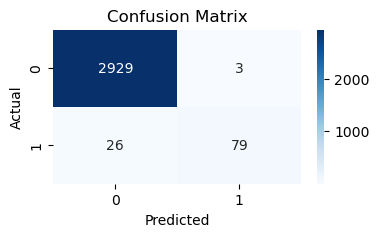

In [33]:
cm = confusion_matrix(yTest, pred)
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=gb_model.classes_, yticklabels=gb_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Gradient Boosting Model Overfitting/Underfitting

In [34]:
print('Training set score: {:.4f}'.format(gb_model.score(X_train_selected, yTrain)))

print('Test set score: {:.4f}'.format(gb_model.score(X_test_selected, yTest)))

Training set score: 0.9986
Test set score: 0.9905


## Gradient Boosting Model Cross Validation

In [35]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(gb_model, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9905154922762975
Precision: 0.8921101092291304
Recall: 0.8053030303030303
F1 Score: 0.844004335379414


## Logistic Regression Model Training

In [36]:
logistic_regressor = LogisticRegression(max_iter=500)

logistic_regressor.fit(X_train_selected, yTrain)
L_pred = logistic_regressor.predict(X_test_selected)

## Logistic Regression Model Evaluation

In [37]:
# Evaluate the model
accuracy = accuracy_score(yTest, L_pred)
classification_report_result = classification_report(yTest, L_pred)
confusion_matrix_result = confusion_matrix(yTest, L_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(yTest, L_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2932
           1       0.99      0.73      0.84       105

    accuracy                           0.99      3037
   macro avg       0.99      0.87      0.92      3037
weighted avg       0.99      0.99      0.99      3037


Confusion Matrix:
[[2931    1]
 [  28   77]]

Accuracy: 0.9904511030622325
Precision: 0.9904212505347455
Recall: 0.9904511030622325
F1 Score: 0.9897685587900766


## Logistic Regression Overfitting/Underfitting

In [38]:
print('Training set score: {:.4f}'.format(logistic_regressor.score(X_train_selected, yTrain)))

print('Test set score: {:.4f}'.format(logistic_regressor.score(X_test_selected, yTest)))

Training set score: 0.9938
Test set score: 0.9905


## Logistic Regression Model Confusion Matrix Plotting

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

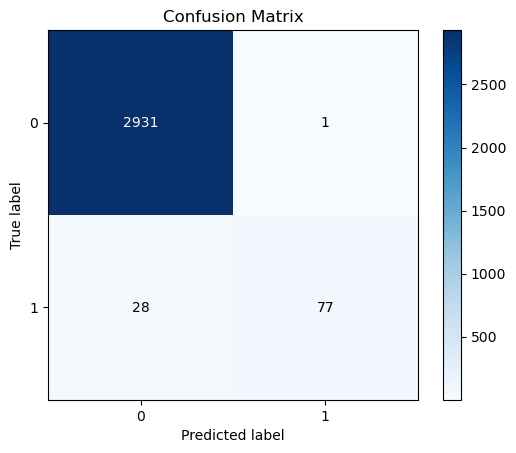

In [39]:
skplt.metrics.plot_confusion_matrix(yTest, L_pred)

## Logistic Regression Model Cross Validation

In [40]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(logistic_regressor, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9908115447795263
Precision: 0.9236246716040932
Recall: 0.7805871212121213
F1 Score: 0.8425476969348331


## KNN Model Training

In [41]:
# Define the parameter grid with different values of k
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize the KNeighborsClassifier
knnmodel = KNeighborsClassifier()

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(knnmodel, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_selected, yTrain)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Initialize the model with the best value of k
best_knnmodel = KNeighborsClassifier(n_neighbors=best_k)

best_knnmodel.fit(X_train_selected, yTrain)

Y_pred = best_knnmodel.predict(X_test_selected)

## KNN Model Evaluation

In [42]:
# Make predictions
y_pred = best_knnmodel.predict(X_test_selected)

accuracy = accuracy_score(yTest, y_pred)
classification_report_result = classification_report(yTest, y_pred)
confusion_matrix_result = confusion_matrix(yTest, y_pred)

# Print the results
print("\nClassification Report:")
print(classification_report_result)
print("\nConfusion Matrix:")
print(confusion_matrix_result)

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(yTest, y_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2932
           1       0.97      0.60      0.74       105

    accuracy                           0.99      3037
   macro avg       0.98      0.80      0.87      3037
weighted avg       0.99      0.99      0.98      3037


Confusion Matrix:
[[2930    2]
 [  42   63]]

Accuracy: 0.9855120184392493
Precision: 0.985292889916928
Recall: 0.9855120184392493
F1 Score: 0.9838566285486597


## KNN Model Confusion Matrix Plotting

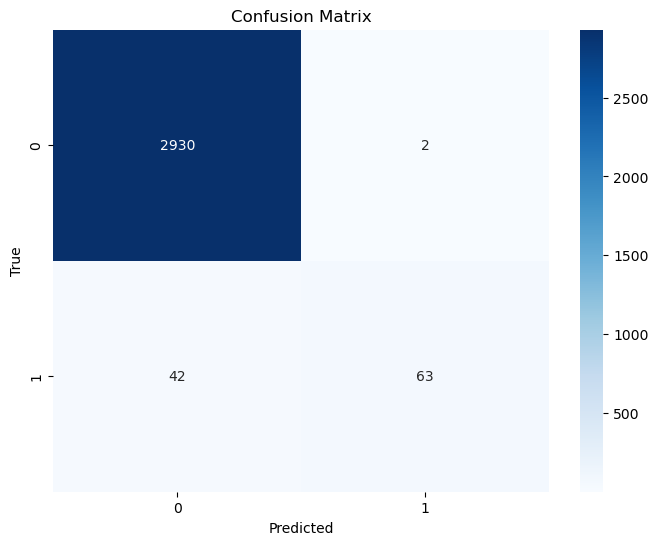

In [43]:
# Compute the confusion matrix
cm = confusion_matrix(yTest, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## KNN Model Overfitting/Underfitting

In [44]:
print('Training set score: {:.4f}'.format(best_knnmodel.score(X_train_selected, yTrain)))
print('Test set score: {:.4f}'.format(best_knnmodel.score(X_test_selected, yTest)))

Training set score: 0.9915
Test set score: 0.9855


## KNN Model Cross Validation

In [45]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(best_knnmodel, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9658170073627819
Precision: 0.392968142968143
Recall: 0.11448863636363635
F1 Score: 0.1750226547491974


## Code : Building a Random Forest Model   

In [46]:
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rf.fit(X_train_selected, yTrain)

RandomForestClassifier(criterion='entropy', random_state=42)

## Random Forest Evaluation

In [47]:
y_pred =rf.predict(X_test_selected)

print("Classification Report:\n", classification_report(yTest, y_pred))
print("Confusion Matrix:\n", confusion_matrix(yTest, y_pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(yTest, y_pred, average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print(f"\nAccuracy: {accuracy}")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2932
           1       0.99      0.76      0.86       105

    accuracy                           0.99      3037
   macro avg       0.99      0.88      0.93      3037
weighted avg       0.99      0.99      0.99      3037

Confusion Matrix:
 [[2931    1]
 [  25   80]]

Accuracy: 0.9855120184392493
Precision: 0.9914081925254015
Recall: 0.9914389199868291
F1 Score: 0.9909040400973317


## Random Forest Model Overfitting/Underfitting

In [48]:
print('Training set score: {:.4f}'.format(rf.score(X_train_selected, yTrain)))
print('Test set score: {:.4f}'.format(rf.score(X_test_selected, yTest)))

Training set score: 1.0000
Test set score: 0.9914


## Random Forest Cross Validation

In [49]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(rf, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9930836867754763
Precision: 0.980536431310625
Recall: 0.7990530303030303
F1 Score: 0.8787176402188015


## Code : Visualizing the Confusion Matrix

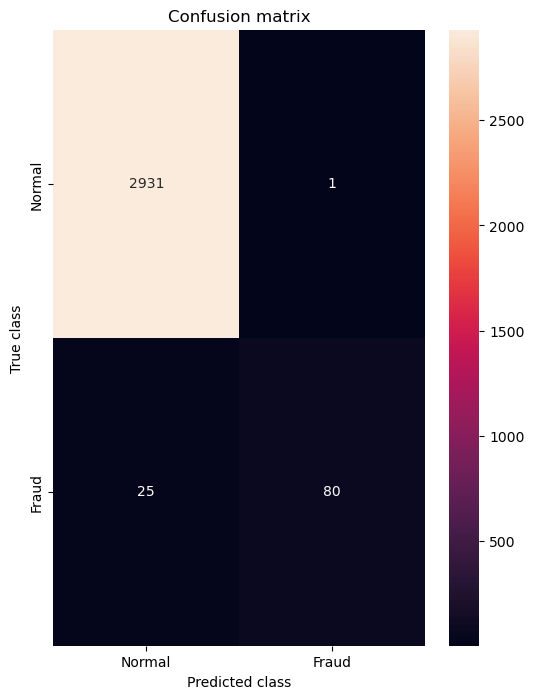

In [53]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, y_pred) 
plt.figure(figsize =(6, 8)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

## Naive Bayes Model Training

In [54]:
naive = GaussianNB()
naive.fit(X_train_selected, yTrain)

GaussianNB()

## Naive Bayes Evaluation

In [55]:
nb_pred = naive.predict(X_test_selected)

print("Classification Report:\n", classification_report(yTest, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(yTest, nb_pred))

# Extract precision, recall, and F1-score from the classification report
precision, recall, f1_score, _ = precision_recall_fscore_support(yTest, nb_pred,average='weighted', zero_division=1)

# Print precision, recall, and F1-score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2932
           1       0.60      0.78      0.68       105

    accuracy                           0.97      3037
   macro avg       0.80      0.88      0.83      3037
weighted avg       0.98      0.97      0.98      3037

Confusion Matrix:
 [[2877   55]
 [  23   82]]
Accuracy: 0.9855120184392493
Precision: 0.9784632605284882
Recall: 0.9743167599604873
F1 Score: 0.9759443638537507


## Naive Bayes Overfitting/Underfitting

In [56]:
print('Training set score: {:.4f}'.format(naive.score(X_train_selected, yTrain)))

print('Test set score: {:.4f}'.format(naive.score(X_test_selected, yTest)))

Training set score: 0.9793
Test set score: 0.9743


## Naive Bayes Cross Validation

In [57]:
# Perform cross-validation and get scores for each metric
precision_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv, scoring=precision_scorer)
accuracy_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv, scoring='accuracy')
f1_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv, scoring='f1')
recall_scores = cross_val_score(naive, X_no_outliers, Y_no_outliers, cv=cv,scoring='recall')

# Print the average scores
print(f'Accuracy: {np.mean(accuracy_scores)}')
print(f'Precision: {np.mean(precision_scores)}')
print(f'Recall: {np.mean(recall_scores)}')
print(f'F1 Score: {np.mean(f1_scores)}')

Accuracy: 0.9884400032775499
Precision: 0.8697564041446133
Recall: 0.7499053030303031
F1 Score: 0.8044362424321294


# Result : 
## Random forest model is faster and more accurate to detect the fraud transactions as soon as it happens..
## so it considered as best. Logistic regression model is also better.